In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from mc_lib.rndm import RndmWrapper
from mc_lib.observable import RealObservable

import cy_ising

In [2]:
def read_conformation(fname):
    struct_conf = []
    
    f = open(fname, 'r')
    f.readline()
    for line in f:
        line_ar = line.split()
        
        struct_conf += [[int(line_ar[0]), int(line_ar[1])]]
        
    return struct_conf

In [3]:
def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)

In [4]:
def tabulate_neighbors(struct):
    neighb = np.zeros((len(struct), 5), dtype=int)
    for site in range(len(struct)):
        coordinate = struct[site]
        c1 = [coordinate[0] + 1, coordinate[1]]
        c2 = [coordinate[0] - 1, coordinate[1]]
        c3 = [coordinate[0], coordinate[1] + 1]
        c4 = [coordinate[0], coordinate[1] - 1]
        C_arr = [c1, c2, c3, c4]
        for coord in C_arr:
            try:
                site1 = struct.index(coord)
                neighb[site, 0] += 1
                neighb[site, neighb[site, 0]] = site1
            except:
                continue
    return neighb

In [5]:
def generate_1D(L):
    struct = []
    for i in range(L):
        struct += [[i, 0]]
    
    return struct

In [9]:
def square_1D(side_L):
    struct = []
    for i in range(side_L):
        struct += [[i, 0]]
        
    for i in range(1, side_L):
        struct += [[side_L-1, i]]
    
    for i in range(side_L - 2, -1, -1):
        struct += [[i, side_L-1]]
        
    for i in range(side_L-2, 0, -1):
        struct += [[0, i]]
    
    return struct

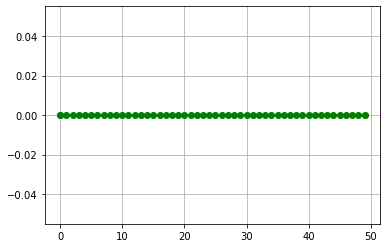

In [6]:
# 1D test
struct_1D = generate_1D(50)
draw_conformation(struct_1D)

In [7]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1D)
L = len(struct_1D)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=100000)

[[ 1  1  0  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 13 11  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 26 24  0  0]
 [ 2 27 25  0  0]
 [ 2 28 26  0  0]
 [ 2 29 27  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 32 30  0  0]
 [ 2 33 31  0  0]
 [ 2 34 32  0  0]
 [ 2 35 33  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 2 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 40 38  0  0]
 [ 2 41 39  0  0]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 46 44  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 49 47  0  0]
 [ 1 48  0  0  0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 


----- sweep =  50000 spins =  [ 1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1
  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1
  1  1] beta =  0.2
  ene =  -9.647587048259036  (naive)
      =  -9.649983723958334 +/- 0.03499617061159591
  mag^2 =  0.029738964843750004 +/- 0.0002045355170283874
  mag^4 =  0.0026174242187500005 +/- 3.824678177094539e-05

----- sweep =  60000 spins =  [-1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1  1
 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1  1] beta =  0.2
  ene =  -9.627856202396627  (naive)
      =  -9.635672433035714 +/- 0.03279263807365983
  mag^2 =  0.029680189732142863 +/- 0.00018356679123698996
  mag^4 =  0.002609624375 +/- 3.465455978264444e-05

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1
 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1
  1 -1] beta =  0.2
  e


----- sweep =  30000 spins =  [-1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1
 -1 -1] beta =  0.4
  ene =  -18.629145695143496  (naive)
      =  -18.629673549107142 +/- 0.03783258801722401
  mag^2 =  0.04350279017857142 +/- 0.0003709452998522838
  mag^4 =  0.005477732321428571 +/- 0.00011092395749044923

----- sweep =  40000 spins =  [-1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1
  1  1] beta =  0.4
  ene =  -18.59531011724707  (naive)
      =  -18.6025390625 +/- 0.03249631611208371
  mag^2 =  0.043527631578947366 +/- 0.0003071024932300173
  mag^4 =  0.005491888421052632 +/- 9.152804554121463e-05

----- sweep =  50000 spins =  [-1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1
 -1 -1] beta =  0.4
 


----- sweep =  20000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
 -1 -1] beta =  0.6
  ene =  -26.301634918254088  (naive)
      =  -26.29307154605263 +/- 0.052270172686638146
  mag^2 =  0.06391315789473685 +/- 0.000932012802749892
  mag^4 =  0.011399024736842105 +/- 0.00032996397457860023

----- sweep =  30000 spins =  [-1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.6
  ene =  -26.289890336988766  (naive)
      =  -26.28278459821429 +/- 0.035984206532299993
  mag^2 =  0.06381830357142858 +/- 0.0007927423045080864
  mag^4 =  0.0115577175 +/- 0.00029148771428377747

----- sweep =  40000 spins =  [ 1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
  1  1] beta =  0.6
  en


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1] beta =  0.8
  ene =  -39.0  (naive)
      =  -39.0 +/- 0.0
  mag^2 =  0.04000000000000001 +/- 0.0
  mag^4 =  0.0016000000000000007 +/- 0.0

----- sweep =  10000 spins =  [-1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1] beta =  0.8
  ene =  -32.46805319468053  (naive)
      =  -32.473478618421055 +/- 0.05329447566994264
  mag^2 =  0.09425131578947367 +/- 0.0014168034237314981
  mag^4 =  0.023545080000000003 +/- 0.0006479887662865391

----- sweep =  20000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1
 -1 -1] beta =  0.8
  ene =  -32.500724963751814  (naive)
      =  -32.490234375 +/- 0.03681927655311


Final:
  ene =  -35.0744  (naive)
      =  -35.075785319010414 +/- 0.014696050699975921
  mag^2 =  0.11434466145833333 +/- 0.0004838665664228246
  mag^4 =  0.03456406208333334 +/- 0.0002797009842819618
[[ 1  1  0  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 13 11  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 26 24  0  0]
 [ 2 27 25  0  0]
 [ 2 28 26  0  0]
 [ 2 29 27  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 32 30  0  0]
 [ 2 33 31  0  0]
 [ 2 34 32  0  0]
 [ 2 35 33  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 2 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 40 38  0  0]
 [ 2 41 39  0  0]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 44 42  0  0]
 [ 2 

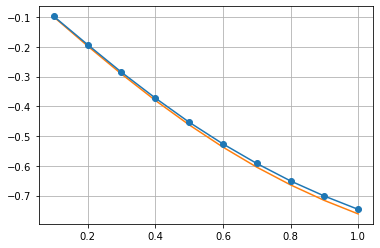

In [8]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L)) # true energy value on 1D
plt.grid(True)
plt.show()

48


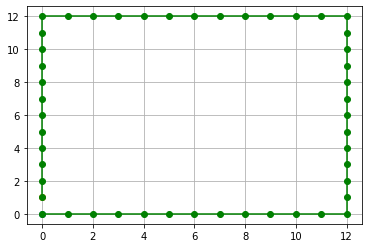

In [19]:
struct_1D = square_1D(13)
print(len(struct_1D))
draw_conformation(struct_1D)

In [20]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1D)
L = len(struct_1D)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=100000)

[[ 2  1 47  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 11 13  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 28 30  0  0]
 [ 2 29 31  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 34 36  0  0]
 [ 2 35 37  0  0]
 [ 2 36 38  0  0]
 [ 2 37 39  0  0]
 [ 2 38 40  0  0]
 [ 2 39 41  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 42 44  0  0]
 [ 2 43 45  0  0]
 [ 2 44 46  0  0]
 [ 2 45 47  0  0]
 [ 2 46  0  0  0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1


----- sweep =  70000 spins =  [-1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1] beta =  0.2
  ene =  -9.469179011728404  (naive)
      =  -9.468462775735295 +/- 0.03455419407103486
  mag^2 =  0.031125660815270118 +/- 0.0001692305088041701
  mag^4 =  0.002804306034775169 +/- 3.266897711102178e-05

----- sweep =  80000 spins =  [ 1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1] beta =  0.2
  ene =  -9.458131773352832  (naive)
      =  -9.458573190789474 +/- 0.030731238565203777
  mag^2 =  0.03115942882515534 +/- 0.00015651194358677688
  mag^4 =  0.002815475550621187 +/- 3.0422496949393085e-05

----- sweep =  90000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1] beta =  0.2
  ene =  -9.452117


----- sweep =  50000 spins =  [ 1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1] beta =  0.4
  ene =  -18.21587568248635  (naive)
      =  -18.213541666666668 +/- 0.02932619779373465
  mag^2 =  0.04610019259982639 +/- 0.0003588109082664734
  mag^4 =  0.006182497666205889 +/- 0.00011793308544544354

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1] beta =  0.4
  ene =  -18.22556290728488  (naive)
      =  -18.224888392857142 +/- 0.0261318712481527
  mag^2 =  0.04603585742768788 +/- 0.0003132667979367769
  mag^4 =  0.00613338937835088 +/- 0.00011083945555242053

----- sweep =  70000 spins =  [-1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1] beta =  0.4
  ene =  -18.2243110


----- sweep =  0 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1] beta =  0.6
  ene =  -16.0  (naive)
      =  -16.0 +/- 0.0
  mag^2 =  0.027777777777777776 +/- 0.0
  mag^4 =  0.0007716049382716049 +/- 0.0

----- sweep =  10000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1] beta =  0.6
  ene =  -25.699430056994302  (naive)
      =  -25.716694078947366 +/- 0.06778406082862032
  mag^2 =  0.07136276869745978 +/- 0.0010244192695840794
  mag^4 =  0.014389716316307422 +/- 0.000457159565808105

----- sweep =  20000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1] beta =  0.6
  ene =  -25.702914854257287  (naive)
      =  -25.69346217105263 +/- 0.044305769307324674
  mag^2 = 


Final:
  ene =  -29.00392  (naive)
      =  -29.006754557291668 +/- 0.017063332747366145
  mag^2 =  0.08417915414880824 +/- 0.00035558549518694717
  mag^4 =  0.019519066767682752 +/- 0.00019660794788416163
[[ 2  1 47  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 11 13  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 28 30  0  0]
 [ 2 29 31  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 34 36  0  0]
 [ 2 35 37  0  0]
 [ 2 36 38  0  0]
 [ 2 37 39  0  0]
 [ 2 38 40  0  0]
 [ 2 39 41  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 42 44  0  0]
 


----- sweep =  60000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1] beta =  0.9
  ene =  -34.37856035732738  (naive)
      =  -34.376255580357146 +/- 0.023571727158676396
  mag^2 =  0.12589881533668154 +/- 0.0007339049366861014
  mag^4 =  0.04167907641678261 +/- 0.0004979579780859806

----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1] beta =  0.9
  ene =  -34.38442307967029  (naive)
      =  -34.382640165441174 +/- 0.021324104135042914
  mag^2 =  0.1256519891078176 +/- 0.0006505945191093167
  mag^4 =  0.04158954483577976 +/- 0.0004365675884389914

----- sweep =  80000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1] beta =  0.9
  ene =  -34.38477019

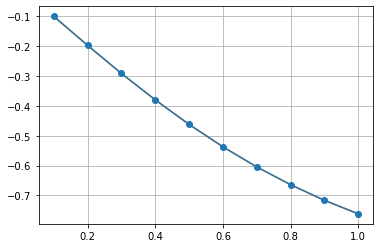

In [21]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L)) # true energy value on 1D
plt.grid(True)
plt.show()

In [29]:
# mean error
(np.array([e.mean / L for e in ene]) - (-th * (1 + th**(L-2)) / (1 + th**L))).mean()

0.00018333215775709482

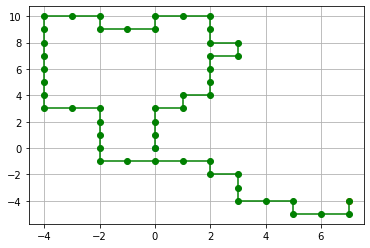

In [26]:
file_name = 'Conformations\\struct_conf_0.dat'
struct_1 = read_conformation(file_name)
draw_conformation(struct_1)

In [28]:
len(struct_1)

50

In [ ]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype = RealObservable)
mag2 = np.empty(N, dtype = RealObservable)
mag4 = np.empty(N, dtype = RealObservable)

neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[N//2], num_sweeps=50000*(i+1))

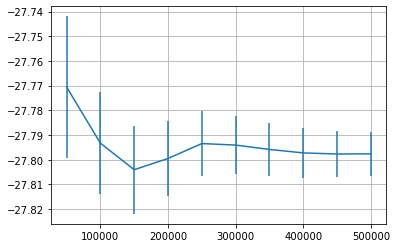

In [11]:
plt.figure()
plt.errorbar(list(range(50000, 50000 * N + 1, 50000)), [e.mean for e in ene], yerr = [e.errorbar for e in ene])
plt.grid(True)
plt.show()

In [12]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=500000)

[[ 2  1 37  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  3  5  0  0]
 [ 2  6  4  0  0]
 [ 2  5  7  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 3 10 12  8  0]
 [ 2  9 11  0  0]
 [ 2 12 10  0  0]
 [ 3 11 13  9  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 14 16  0  0]
 [ 2 15 17  0  0]
 [ 2 18 16  0  0]
 [ 2 17 19  0  0]
 [ 2 18 20  0  0]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 2 21 23  0  0]
 [ 2 22 24  0  0]
 [ 2 23 25  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 3 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 38 40  0  0]
 [ 2 41 39  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 44 46  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 47 49  0  0]
 [ 1 48  0  0  0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 


----- sweep =  190000 spins =  [ 1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1
 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1
  1  1] beta =  0.1
  ene =  -5.081957463381771  (naive)
      =  -5.073475230823863 +/- 0.016220831920133755
  mag^2 =  0.024509135298295456 +/- 8.435901703095803e-05
  mag^4 =  0.0017698916051136356 +/- 1.4083725365774531e-05

----- sweep =  200000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1
 -1 -1] beta =  0.1
  ene =  -5.082659586702066  (naive)
      =  -5.079996744791666 +/- 0.015835464064287232
  mag^2 =  0.024510148111979175 +/- 8.341173252473395e-05
  mag^4 =  0.0017718276432291656 +/- 1.3457204018851053e-05

----- sweep =  210000 spins =  [-1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1
  1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1] be

----- sweep =  410000 spins =  [ 1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1
  1 -1] beta =  0.1
  ene =  -5.097185128816759  (naive)
      =  -5.097951253255208 +/- 0.011224266884700818
  mag^2 =  0.02454538167317708 +/- 6.452839304386662e-05
  mag^4 =  0.0017783065169270805 +/- 1.3980901250151945e-05

----- sweep =  420000 spins =  [ 1 -1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1
  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1] beta =  0.1
  ene =  -5.097995004773798  (naive)
      =  -5.097951253255208 +/- 0.011039117189598987
  mag^2 =  0.02454538167317708 +/- 6.452839304386662e-05
  mag^4 =  0.0017783065169270805 +/- 1.3980901250151945e-05

----- sweep =  430000 spins =  [ 1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1
  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1
 -1  1] beta 


----- sweep =  90000 spins =  [-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1
 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1
 -1 -1] beta =  0.2
  ene =  -10.078499127787468  (naive)
      =  -10.0709716796875 +/- 0.02505784665501878
  mag^2 =  0.030117382812500003 +/- 0.00013434482530412612
  mag^4 =  0.0026695690624999996 +/- 3.1258175079912805e-05

----- sweep =  100000 spins =  [-1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1
 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1] beta =  0.2
  ene =  -10.066389336106639  (naive)
      =  -10.068074544270834 +/- 0.023687406393687018
  mag^2 =  0.030074300130208335 +/- 0.00013374927176343132
  mag^4 =  0.002661984505208333 +/- 2.8685182925544233e-05

----- sweep =  110000 spins =  [-1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1
 -1 -1] b


----- sweep =  300000 spins =  [-1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1
  1  1] beta =  0.2
  ene =  -10.089043036523211  (naive)
      =  -10.089850531684027 +/- 0.013181302108670698
  mag^2 =  0.030230061848958337 +/- 7.97559247699004e-05
  mag^4 =  0.0026796750781249985 +/- 1.5895980146136917e-05

----- sweep =  310000 spins =  [ 1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1
 -1  1] beta =  0.2
  ene =  -10.087409395453562  (naive)
      =  -10.089850531684027 +/- 0.012918503825166402
  mag^2 =  0.030230061848958337 +/- 7.89792208266658e-05
  mag^4 =  0.0026796750781249985 +/- 1.5913801790490577e-05

----- sweep =  320000 spins =  [ 1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1
  1  1] 


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1
 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1
  1 -1] beta =  0.30000000000000004
  ene =  -14.86961303869613  (naive)
      =  -14.861430921052632 +/- 0.085856355489721
  mag^2 =  0.036839473684210526 +/- 0.0006288062682254052
  mag^4 =  0.003942755789473684 +/- 0.00014764765174692048

----- sweep =  20000 spins =  [ 1  1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1
 -1 -1] beta =  0.30000000000000004
  ene =  -14.876306184690765  (naive)
      =  -14.860608552631579 +/- 0.05569069520645198
  mag^2 =  0.03741217105263159 +/- 0.000395643773427436
  mag^4 =  0.004105241052631579 +/- 0.00010709879991183009

----- sweep =  30000 spins =  [ 1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -


----- sweep =  210000 spins =  [ 1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.30000000000000004
  ene =  -14.961781134375551  (naive)
      =  -14.957967122395834 +/- 0.020171938739453724
  mag^2 =  0.037189615885416666 +/- 0.00011301535011010667
  mag^4 =  0.003995727291666665 +/- 2.6980766399304008e-05

----- sweep =  220000 spins =  [ 1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1
 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1
 -1  1] beta =  0.30000000000000004
  ene =  -14.963509256776106  (naive)
      =  -14.960749699519228 +/- 0.01881119063455804
  mag^2 =  0.03725907451923077 +/- 0.00011103097763532007
  mag^4 =  0.00400976298076923 +/- 2.6815634297050342e-05

----- sweep =  230000 spins =  [ 1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  


----- sweep =  410000 spins =  [ 1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1
 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1  1] beta =  0.30000000000000004
  ene =  -14.950829388221004  (naive)
      =  -14.950251261393229 +/- 0.01252567302248812
  mag^2 =  0.03729943033854164 +/- 8.58108957114091e-05
  mag^4 =  0.004035275729166668 +/- 1.9779010486446684e-05

----- sweep =  420000 spins =  [-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
  1 -1] beta =  0.30000000000000004
  ene =  -14.948871550305833  (naive)
      =  -14.950251261393229 +/- 0.01252567302248812
  mag^2 =  0.03729943033854164 +/- 8.58108957114091e-05
  mag^4 =  0.004035275729166668 +/- 1.9732096450294454e-05

----- sweep =  430000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 


----- sweep =  110000 spins =  [ 1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1
  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1
 -1 -1] beta =  0.4
  ene =  -19.535049681366534  (naive)
      =  -19.534517728365383 +/- 0.02091874455069583
  mag^2 =  0.04570722656250001 +/- 0.00021087124729895682
  mag^4 =  0.006020429350961537 +/- 6.207867000210355e-05

----- sweep =  120000 spins =  [ 1  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1
 -1 -1] beta =  0.4
  ene =  -19.546328780593495  (naive)
      =  -19.538277762276785 +/- 0.020997728297501423
  mag^2 =  0.04577399553571429 +/- 0.00020412912888917299
  mag^4 =  0.006038944374999998 +/- 6.035361817484965e-05

----- sweep =  130000 spins =  [-1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1
 -1 -1] bet


----- sweep =  330000 spins =  [ 1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1
  1 -1] beta =  0.4
  ene =  -19.562077084614895  (naive)
      =  -19.56220703125 +/- 0.011665930284573271
  mag^2 =  0.04617615722656247 +/- 0.00014864607346827435
  mag^4 =  0.006141312945312502 +/- 3.912895656889565e-05

----- sweep =  340000 spins =  [-1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1
 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1] beta =  0.4
  ene =  -19.5574924779633  (naive)
      =  -19.56220703125 +/- 0.011665930284573271
  mag^2 =  0.04617615722656247 +/- 0.00014864607346827435
  mag^4 =  0.006141312945312502 +/- 3.912895656889565e-05

----- sweep =  350000 spins =  [ 1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1] beta =  0.4


----- sweep =  10000 spins =  [-1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1] beta =  0.5
  ene =  -23.845115488451153  (naive)
      =  -23.826274671052634 +/- 0.0782210566672829
  mag^2 =  0.05627944078947368 +/- 0.0007407246239596495
  mag^4 =  0.00889653447368421 +/- 0.0002513574325170556

----- sweep =  20000 spins =  [-1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1
  1  1] beta =  0.5
  ene =  -23.839958002099895  (naive)
      =  -23.837273848684216 +/- 0.054928978493800885
  mag^2 =  0.05708437499999999 +/- 0.0005294166872014453
  mag^4 =  0.009238485 +/- 0.0001879971055578843

----- sweep =  30000 spins =  [-1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
  1  1] beta =  0.5
  ene = 

----- sweep =  230000 spins =  [-1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1
  1  1] beta =  0.5
  ene =  -23.871891861339734  (naive)
      =  -23.871721540178573 +/- 0.01606405547468803
  mag^2 =  0.05700787527901786 +/- 0.00016522412914315846
  mag^4 =  0.009175605145089288 +/- 5.570183578515862e-05

----- sweep =  240000 spins =  [-1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1 -1] beta =  0.5
  ene =  -23.872463031404035  (naive)
      =  -23.871721540178573 +/- 0.01606405547468803
  mag^2 =  0.05700787527901786 +/- 0.00016215633102218085
  mag^4 =  0.009175605145089288 +/- 5.528486942387549e-05

----- sweep =  250000 spins =  [ 1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1
  1  1] beta 


----- sweep =  440000 spins =  [-1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1
  1 -1] beta =  0.5
  ene =  -23.869125297442505  (naive)
      =  -23.868633563701927 +/- 0.01118257779880644
  mag^2 =  0.057099297626201834 +/- 0.00011819812306576923
  mag^4 =  0.009248434332932695 +/- 4.166027076668339e-05

----- sweep =  450000 spins =  [ 1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1] beta =  0.5
  ene =  -23.87017139961911  (naive)
      =  -23.868633563701927 +/- 0.010822309319959584
  mag^2 =  0.057099297626201834 +/- 0.00011655159085643312
  mag^4 =  0.009248434332932695 +/- 4.166027076668339e-05

----- sweep =  460000 spins =  [ 1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1] be


----- sweep =  150000 spins =  [-1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1] beta =  0.6
  ene =  -27.803367977546817  (naive)
      =  -27.804036458333332 +/- 0.017901734530038346
  mag^2 =  0.07052533637152779 +/- 0.0002608866927127119
  mag^4 =  0.01387790887152778 +/- 0.00011326644272249512

----- sweep =  160000 spins =  [-1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1] beta =  0.6
  ene =  -27.798395010031186  (naive)
      =  -27.798956620065788 +/- 0.017901734530038346
  mag^2 =  0.0704701171875 +/- 0.0002518362616303543
  mag^4 =  0.013825451990131582 +/- 0.00010896689655161553

----- sweep =  170000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1 -1] beta = 


----- sweep =  360000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1] beta =  0.6
  ene =  -27.796197788339477  (naive)
      =  -27.7958251953125 +/- 0.010479572605136786
  mag^2 =  0.07051681640624996 +/- 0.0001724530950161423
  mag^4 =  0.013846126593750003 +/- 6.92491341204722e-05

----- sweep =  370000 spins =  [-1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1] beta =  0.6
  ene =  -27.79745189877865  (naive)
      =  -27.796175870028407 +/- 0.010442564384051096
  mag^2 =  0.07056510564630677 +/- 0.0001724530950161423
  mag^4 =  0.013866577776988636 +/- 6.791055694150038e-05

----- sweep =  380000 spins =  [-1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1
 -1 -1] beta =  

----- sweep =  40000 spins =  [-1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -31.230844228894277  (naive)
      =  -31.228104440789473 +/- 0.031827477568475135
  mag^2 =  0.08703190789473685 +/- 0.000618443924367111
  mag^4 =  0.020652693684210528 +/- 0.00029794924238851306

----- sweep =  50000 spins =  [ 1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -31.243195136097277  (naive)
      =  -31.239786783854168 +/- 0.031340122516880446
  mag^2 =  0.08711578776041669 +/- 0.0005459594969148759
  mag^4 =  0.020656985260416667 +/- 0.00028158540298709665

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 


----- sweep =  240000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1  1] beta =  0.7000000000000001
  ene =  -31.30538206090808  (naive)
      =  -31.307425362723215 +/- 0.015059355315076423
  mag^2 =  0.08737615094866066 +/- 0.0002449301552598372
  mag^4 =  0.020788732466517853 +/- 0.00011892233968372165

----- sweep =  250000 spins =  [ 1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
 -1 -1] beta =  0.7000000000000001
  ene =  -31.299862800548798  (naive)
      =  -31.301586914062504 +/- 0.015059355315076423
  mag^2 =  0.08738164713541664 +/- 0.00023508341522439794
  mag^4 =  0.02079495301041667 +/- 0.00011402785959724615

----- sweep =  260000 spins =  [-1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1

----- sweep =  440000 spins =  [ 1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1
  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -31.31094020240863  (naive)
      =  -31.310415414663463 +/- 0.011204171411506324
  mag^2 =  0.08745905573918268 +/- 0.00018844782613861878
  mag^4 =  0.020840284681490365 +/- 9.164348424794811e-05

----- sweep =  450000 spins =  [ 1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1
  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -31.311772640505243  (naive)
      =  -31.310415414663463 +/- 0.011204171411506324
  mag^2 =  0.08745905573918268 +/- 0.00018923755924347887
  mag^4 =  0.020840284681490365 +/- 9.094386027432743e-05

----- sweep =  460000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 


----- sweep =  130000 spins =  [-1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1] beta =  0.8
  ene =  -34.40054307274559  (naive)
      =  -34.400081380208334 +/- 0.016574561747456883
  mag^2 =  0.10750631510416668 +/- 0.0005453887659286477
  mag^4 =  0.030688267604166663 +/- 0.0002786149866272995

----- sweep =  140000 spins =  [-1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1 -1] beta =  0.8
  ene =  -34.40838994007186  (naive)
      =  -34.40869140625001 +/- 0.01679547048950981
  mag^2 =  0.10777566636029409 +/- 0.0005622286748674917
  mag^4 =  0.030748629007352944 +/- 0.00024908941240295865

----- sweep =  150000 spins =  [-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1] beta = 


----- sweep =  340000 spins =  [ 1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.8
  ene =  -34.39489589736501  (naive)
      =  -34.395043945312494 +/- 0.009112230361265813
  mag^2 =  0.10804109374999997 +/- 0.0003316196158468174
  mag^4 =  0.03095329118749998 +/- 0.00016032721930767427

----- sweep =  350000 spins =  [-1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1] beta =  0.8
  ene =  -34.39451030139914  (naive)
      =  -34.395043945312494 +/- 0.0090824266559222
  mag^2 =  0.10804109374999997 +/- 0.0003158311439663719
  mag^4 =  0.03095329118749998 +/- 0.00015316767503692507

----- sweep =  360000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1] beta =  


----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1 -1] beta =  0.9
  ene =  -37.04989750512475  (naive)
      =  -37.04615542763158 +/- 0.037738202932582524
  mag^2 =  0.13273092105263157 +/- 0.0012291767078821136
  mag^4 =  0.045479941052631576 +/- 0.0008125695450660746

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1] beta =  0.9
  ene =  -37.049265024499185  (naive)
      =  -37.05419921875 +/- 0.02979107743977379
  mag^2 =  0.13397767857142856 +/- 0.00117038359527929
  mag^4 =  0.04621893785714285 +/- 0.0006591655635164619

----- sweep =  40000 spins =  [-1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1
  1  1] beta =  0.9
  ene


----- sweep =  230000 spins =  [-1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1
  1  1] beta =  0.9
  ene =  -37.093695244803286  (naive)
      =  -37.09382847377232 +/- 0.010537305533942906
  mag^2 =  0.13416295340401777 +/- 0.0003715663137197303
  mag^4 =  0.0459522112611607 +/- 0.0002324792872893203

----- sweep =  240000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1
  1  1] beta =  0.9
  ene =  -37.09516627014054  (naive)
      =  -37.09382847377232 +/- 0.010289255418226383
  mag^2 =  0.13416295340401777 +/- 0.0003633373333653664
  mag^4 =  0.0459522112611607 +/- 0.00022712343935847714

----- sweep =  250000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
  1  1] beta =  0.


----- sweep =  470000 spins =  [ 1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1] beta =  0.9
  ene =  -37.08728066536029  (naive)
      =  -37.088165283203125 +/- 0.007424877660572643
  mag^2 =  0.13391240931919646 +/- 0.0002576534644936343
  mag^4 =  0.04590386275669642 +/- 0.00015948404254637107

----- sweep =  480000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.9
  ene =  -37.08677481921913  (naive)
      =  -37.088165283203125 +/- 0.007239231300573386
  mag^2 =  0.13391240931919646 +/- 0.00025447727542609515
  mag^4 =  0.04590386275669642 +/- 0.0001578544030926468

----- sweep =  490000 spins =  [ 1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1
 -1 -1] beta =


----- sweep =  150000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1] beta =  1.0
  ene =  -39.397504016639886  (naive)
      =  -39.3976101345486 +/- 0.013169001138177714
  mag^2 =  0.16491498480902775 +/- 0.000631166349734662
  mag^4 =  0.06674299772569443 +/- 0.00042576543442993624

----- sweep =  160000 spins =  [-1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  1.0
  ene =  -39.39927250454684  (naive)
      =  -39.398141961348685 +/- 0.01247516867606517
  mag^2 =  0.16482470189144735 +/- 0.0006043696726884191
  mag^4 =  0.06669436261513156 +/- 0.0004135809166976001

----- sweep =  170000 spins =  [ 1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1] beta =  1.


----- sweep =  360000 spins =  [-1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1] beta =  1.0
  ene =  -39.39109891361413  (naive)
      =  -39.39324951171875 +/- 0.008855934060681348
  mag^2 =  0.16552173828124997 +/- 0.0006601839545635072
  mag^4 =  0.0672327025625 +/- 0.00048243791636668756

----- sweep =  370000 spins =  [ 1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  1.0
  ene =  -39.392431371807106  (naive)
      =  -39.39132967862216 +/- 0.008855934060681348
  mag^2 =  0.16541324573863633 +/- 0.0006601839545635072
  mag^4 =  0.06716009616477273 +/- 0.00048243791636668756

----- sweep =  380000 spins =  [ 1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  1.0

In [18]:
from numpy import tanh

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


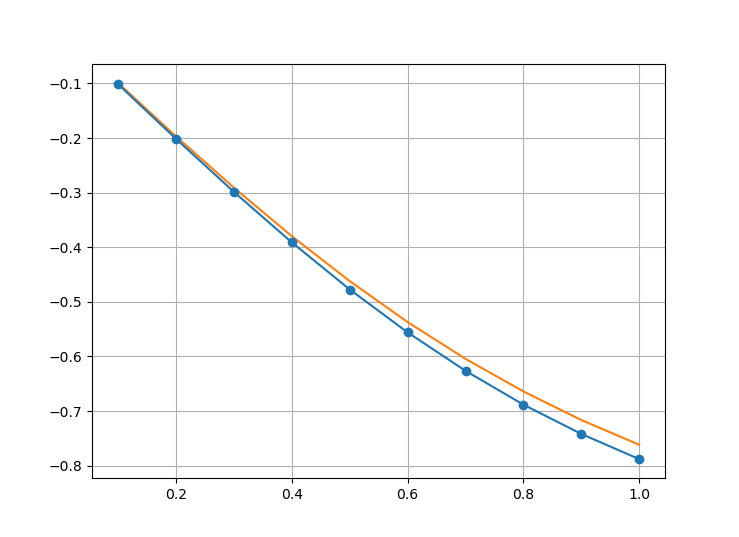

In [23]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

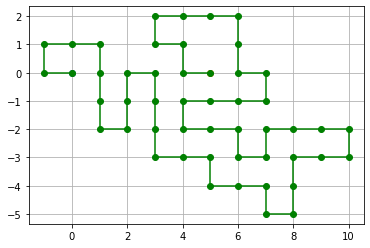

In [29]:
file_name = 'Conformations\\struct_conf_1.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [ ]:
neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
beta = 1
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)

In [ ]:
neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
beta = 0.0001
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)